In [1]:
using Plots
using LinearAlgebra
using Random
using JLD
using StatsPlots
using ProgressMeter
include("/home/javier/Desktop/alpcahus/alpcahus.jl")
include("/home/javier/Desktop/alpcahus/cluster.jl")
include("/home/javier/Desktop/alpcahus/otherMethods.jl")
include("/home/javier/Desktop/alpcahus/adssc.jl")

lsr (generic function with 1 method)

In [2]:
Y1 = load("astroData_z2.jld","Yfull")
Y2 = load("astroData_z1.jld", "Yfull");
Y2 = Y2[:,randperm(size(Y2)[2])[1:2500]];
Y1 = Y1[51:281-50,randperm(size(Y1)[2])[1:2500]];
K = 2;

In [3]:
# Y1 = load("astroData_z2_bal.jld","Yfull")
# Y2 = load("astroData_z2.jld", "Yfull");
# Y2 = Y2[51:281-50,randperm(size(Y2)[2])[1:5000]];
# Y1 = Y1[:,randperm(size(Y1)[2])[1:5000]];
# K = 2;

In [4]:
#Y1s = Y1[:, randperm(5000)[1:10]]
Y = hcat(Y1,Y2);
C = vcat(ones(2500), 2*ones(2500));

In [6]:
U = []
for k=1:K
    push!(U,fastALPCAH(Y[:,C .== k], 3; varfloor=1e-9, alpcahIter= 100, fastCompute=false))
end
C_oracle = clusterAssignment(Y, U, K);
clusterError(C,C_oracle)

3.14

In [7]:
trainSize = 200
Ytest = hcat(Y1[:,randperm(2500)[1:trainSize]], Y2[:,randperm(2500)[1:trainSize]]);
Ctest = vcat(ones(trainSize), 2*ones(trainSize));

In [8]:
C_ekss = ALPCAHUS(Ytest,K,[3;3]; B=64, q=20, T=3, subspaceMethod=:pca, finalStep=false)
clusterError(Ctest,C_ekss)

11.25

In [9]:
# alpcahus trail
C_alpcahus = ALPCAHUS(Ytest,K,[3;3]; B=64, q=20, T=3, alpcahIter=10, subspaceMethod=:alpcah, finalStep=true) 
clusterError(Ctest,C_alpcahus)

4.75

In [10]:
# ekss smart init trial
C_kss = ALPCAHUS(Ytest, K, [3;3]; B=1, q=20, T=100, subspaceMethod=:pca, finalStep=false, spectralStart=true)
clusterError(Ctest, C_kss)

49.25

In [11]:
# alpcahus smart init trail
C_alpcah = ALPCAHUS(Ytest,K, [3;3]; B=1, q=20, T=100, alpcahIter=10, subspaceMethod=:alpcah, finalStep=true, spectralStart=true)
clusterError(Ctest, C_alpcah)

5.5

In [16]:
C_adssc = adsscWrapper(Ytest, 10000,0.1; K=2)
clusterError(Ctest, C_adssc)

5.25

In [13]:
# tsc
C_tsc = tscWrapper(Ytest, 10; K=2)
clusterError(Ctest,C_tsc)

27.0

In [14]:
# kmeans
C_kmeans = kmeans(Elkan(), Ytest, 2; k_init="k-means++").assignments
clusterError(Ctest,C_kmeans)

49.75

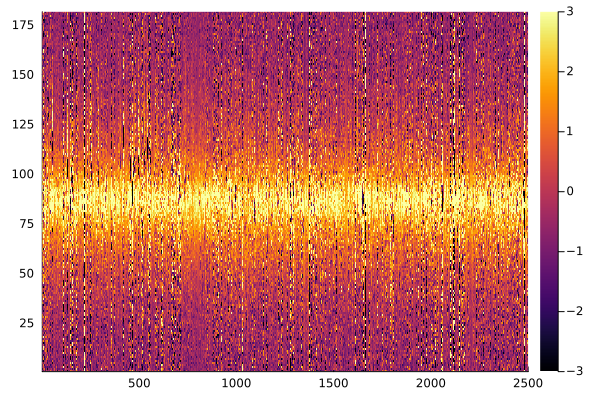

In [17]:
heatmap(Y1, clim=(-3,3))

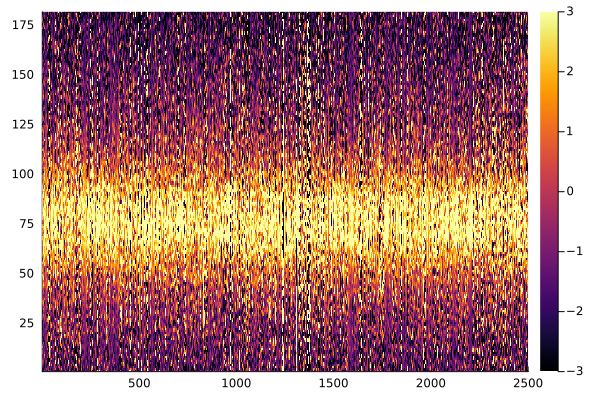

In [18]:
heatmap(Y2, clim=(-3,3))